<a href="https://colab.research.google.com/github/rajdeepbanerjee-git/JNCLectures_Intro_to_ML/blob/main/Week6/Lec6_MMC_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

First five rows and col values 
X1_b : 
 [[1.         2.51526543 1.11143935]
 [1.         1.8155981  1.11969719]
 [1.         2.69637316 0.62563218]
 [1.         1.67280531 0.65930057]
 [1.         1.89593761 5.18540259]]  
 y1 :
 [ 1  1  1  1 -1]


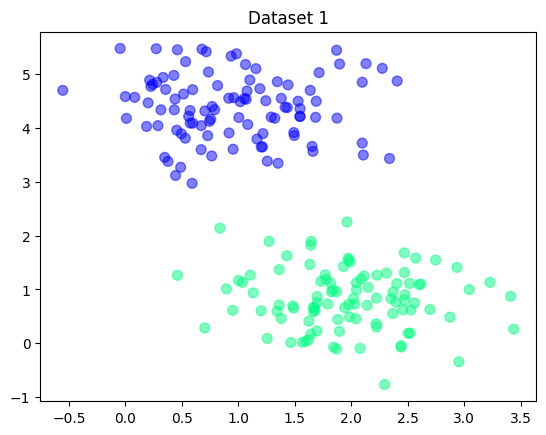

In [2]:
# creating dataset
X1, y1 = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
y1 = np.where(y1 <= 0, -1, 1)
X1_b = X1_b = np.c_[np.ones((len(X1), 1)), X1]

# plot data
print("First five rows and col values \nX1_b : \n",X1_b[:5], " \n y1 :\n",y1[:5])
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='winter', alpha=.5)
plt.title("Dataset 1")
plt.show()

#### MMC

In [11]:
w = np.zeros(len(X1_b[0]))
eta = 0.001
lambda_ = 1 # 0.01
n = 10000

for epoch in range(1,n):
    for i, x in enumerate(X1_b):
        if (y1[i]*np.dot(X1_b[i], w)) < 1:
            w = w + eta * ( (X1_b[i] * y1[i]) + (-2  *(lambda_)* w) )
        else:
            w = w - eta * (2  *(lambda_)* w)

In [12]:
# prediction
pred = np.dot(X1_b, w)
y_pred = [1 if val > 0 else -1 for val in pred]
accuracy_score(y1, y_pred)

0.965

Now, let us introduce lambda_ != 1 , this is basically soft margin classifier ...

In [19]:
w = np.zeros(len(X1_b[0]))
eta = 0.001
lambda_ = 1.5 # increasing lambda_ reduces coefficients, allowing more misclassifications
n = 10000

for epoch in range(1,n):
    for i, x in enumerate(X1_b):
        if (y1[i]*np.dot(X1_b[i], w)) < 1:
            w = w + eta * ( (X1_b[i] * y1[i]) + (-2  *(lambda_)* w) )
        else:
            w = w - eta * (2  *(lambda_)* w)

In [20]:
w

array([ 0.06250233,  0.20138387, -0.28769939])

In [21]:
# prediction
pred = np.dot(X1_b, w)
y_pred = [1 if val > 0 else -1 for val in pred]
accuracy_score(y1, y_pred)

0.935

In [22]:
confusion_matrix(y1, y_pred)

array([[100,   0],
       [ 13,  87]])

#### DIY: Try lambda 0.01, 0.05, 1/epoch

Equivalent approach to soft-margin classifier ...

In [23]:
w = np.zeros(len(X1_b[0]))
eta = 0.001
n = 10000

for epoch in range(1,n):
  cost_ = 1/epoch
  for i, x in enumerate(X1_b):
       if cost_ < 0:
            break # makes sure that cost is non-negative - stops overfitting
       if (y1[i]*np.dot(X1_b[i], w)) < (1 - cost_):
           w = w + eta *  ( (X1_b[i] * y1[i]) + (-2  * w) )
           cost_ = cost_ - eta * (cost_ - 1)

       else:
           w = w - eta * (2  * w)


In [24]:
w

array([ 0.11277096,  0.29903652, -0.31364374])

In [25]:
# prediction
pred = np.dot(X1_b, w)
y_pred = [1 if val > 0 else -1 for val in pred]
accuracy_score(y1, y_pred)

0.98

#### DIY: Increase cost 0.5, 1, 2, 3, 4, 5 and see what happens with accuracy and confusion matrix!